In [ ]:
"""
با سه روش زیر این تصاویر را تیز کنید و نتایج هر سه را باهم مقایسه کنید:
الف( اعمال فیلتر تیز کننده الپالسی
ب( جمع کردن تصویر اصلی با نتیجه فیلتر الپالسی
پ( استفاده از فیلتر تیز کننده گوسی
ج( اعمال فیلتر LOG
پارامتر آلفا را تغییر دهید و تأثیر این پارامتر را بر روی تصاویر خروجی توضیح دهید. تفاوت این ۳ روش را توضیح دهید.
"""

In [ ]:
"""
تفاوت هر روش با یکدیگر

   فیلتر لاپلاسین:
به خاطر حساسیت بالا به نویز، ممکنه نویزها نیز تیز بشن و عکس پر از نویز شه.
تو این روش  فیلتر لاپلاسین   روی عکس اعمال میشه و لبه‌ها رو برجسته و عکس را تیزتر میکنه.

جمع کردن عکس اصلی با نتیجه فیلتر لاپلاسین:
تو این روش، عکس اصلی با خروجی فیلتر لاپلاسین جمع میشه که باعث تیزتر شدن لبه‌ها میشه در حالی که حالت اولیه عکس حفظ میشه.
پارامتر آلفا نعیین میکنه که چقدر از نتیجه فیلتر لاپلاسین به عکس اصلی اضافه شه. افزایش آلفا باعث تیزتر شدن عکس و احتمالاً افزایش نویز میشه.

استفاده از فیلتر تیز کننده گوسی:
  تو روش ابتدا از فیلتر گوسی برای نرم کردن عکس استفاده میشه و بعد فرق بین عکس اولیه و عکس نرم شده رو برای تیز کردن به کار میبره.
  پارامتر آلفا تو این حالت هم مثل روش قبلی عمل میکنه اما به خاطر نرم شدن عکس قبل از تیز کردن، نویزها کمتر برجسته میشه و نتیجه عکس تیزتر ولی با نویز کمتره.

اعمال فیلتر LOG :
این روش ترکیبی از فیلتر گوسی و لاپلاسینه. اول عکس با فیلتر گوسی نرم میشه و بعد فیلتر لاپلاسین اعمال مشه.
این روش نویزها رو کاهش میده و بعد لبه‌ها رو برجسته مکینه به خاطر همین عکس خروجی تیزتر و با نویز کمتره.

 پارامتر آلفا:
آلفا بزرگ: عکس بسیار تیز میشه و لبه‌ها و جزئیات  برجسته ت رمیشن اما نویزها هم بیشتر میشن.
آلفا کوچک: عکس  یکمی تیز میشه و تغییرات کمی تو لبه‌ها دیده میشه.

"""

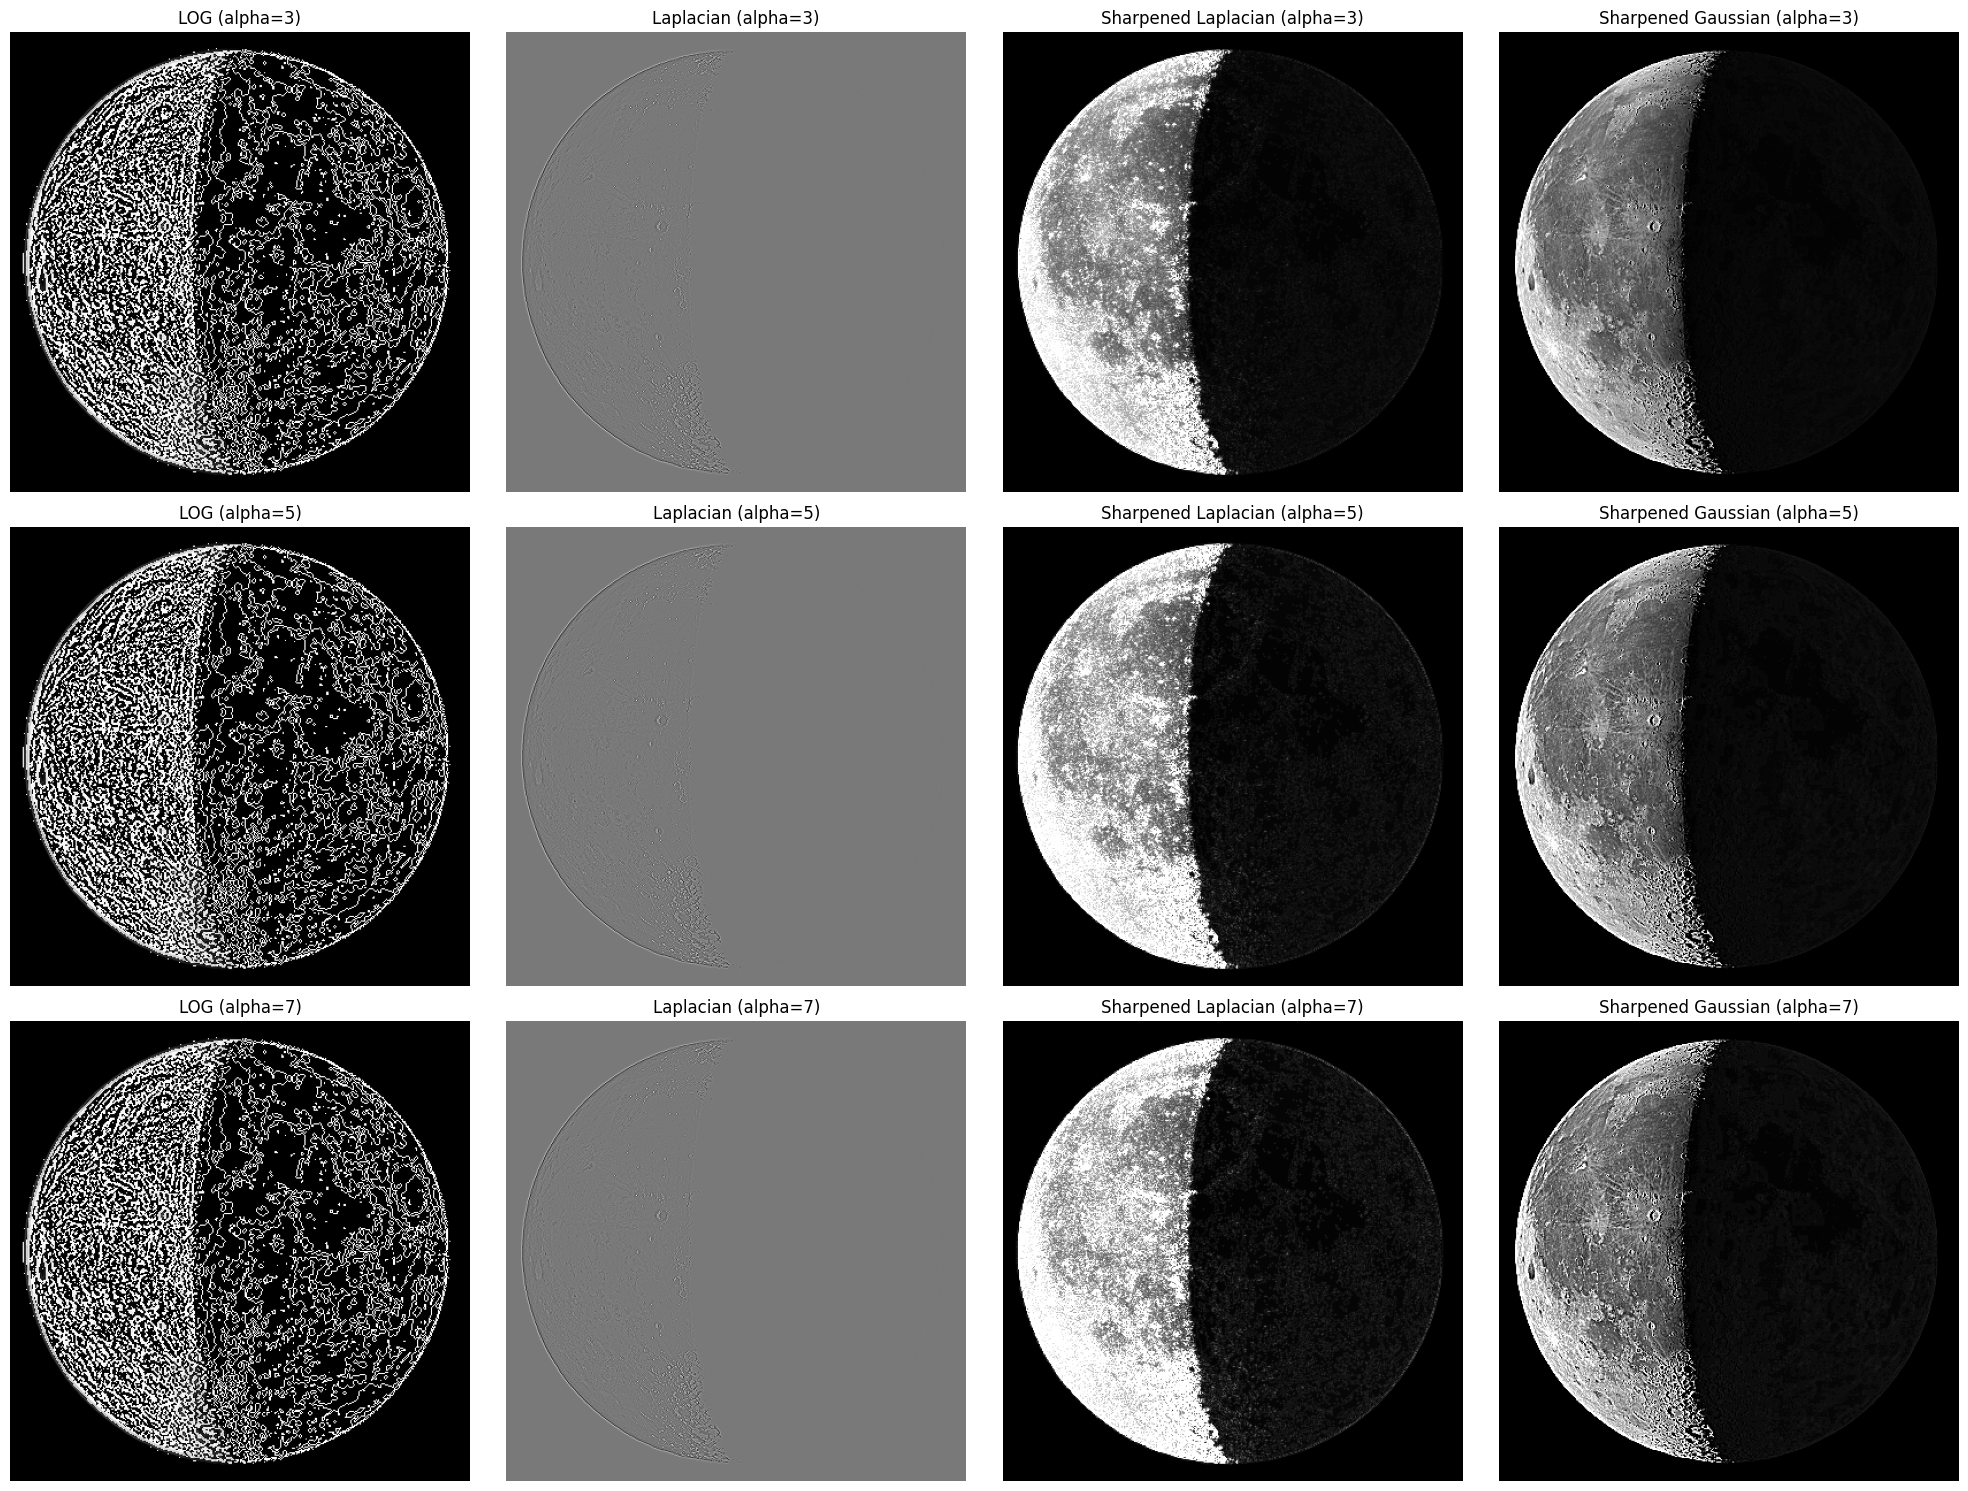

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpli
import cv2
from scipy.ndimage import laplace, gaussian_filter

# Function to read the image using matplotlib
def readImg(path):
    image = mpli.imread(path)
    if image.ndim == 3:
        image = image.mean(axis=2)  # Convert to grayscale if it's a color image
    return (image * 255).astype(np.uint8)

# Function to apply Laplacian filter
def applyLap(image):
    return cv2.Laplacian(image, cv2.CV_64F)

# Function to sharpen using Laplacian result
def sharpenLap(image, alpha):
    laplacian = applyLap(image)
    laplacian = cv2.convertScaleAbs(laplacian)  # Convert to uint8
    return cv2.addWeighted(image, 1, laplacian, alpha, 0)

# Function to apply Laplacian of Gaussian (LOG)
def applyLog(image):
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    return laplace(blurred)

# Function to sharpen using Gaussian filter
def sharpenGauss(image, alpha):
    blurred = gaussian_filter(image, sigma=1)
    blurred = cv2.convertScaleAbs(blurred)  # Convert to uint8
    return cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)

# Path to the image
path = 'D:\\sadeneh\\تمرین دوم\\سادنه صادقی- 9913012008\\Q2\\2-1.jpg'  

# Load the image
image = readImg(path)

# Apply filters and sharpening methods
values = [3, 5, 7]  # Different alpha values to observe the effect

fig, axs = plt.subplots(len(values), 4, figsize=(20, 15))

for i, alpha in enumerate(values):

    # Laplacian of Gaussian (LOG)
    log = applyLog(image)
    axs[i, 0].imshow(log, cmap='gray')
    axs[i, 0].set_title(f'LOG (alpha={alpha})')
    axs[i, 0].axis('off')


    # Laplacian
    laplacian = applyLap(image)
    axs[i, 1].imshow(laplacian, cmap='gray')
    axs[i, 1].set_title(f'Laplacian (alpha={alpha})')
    axs[i, 1].axis('off')


    # Laplacian and Original
    sharpenedLap = sharpenLap(image, alpha)
    axs[i, 2].imshow(sharpenedLap, cmap='gray')
    axs[i, 2].set_title(f'Sharpened Laplacian (alpha={alpha})')
    axs[i, 2].axis('off')




    # Gaussian Sharpening
    sharpenedGauss = sharpenGauss(image, alpha)
    axs[i, 3].imshow(sharpenedGauss, cmap='gray')
    axs[i, 3].set_title(f'Sharpened Gaussian (alpha={alpha})')
    axs[i, 3].axis('off')


plt.tight_layout()
plt.show()


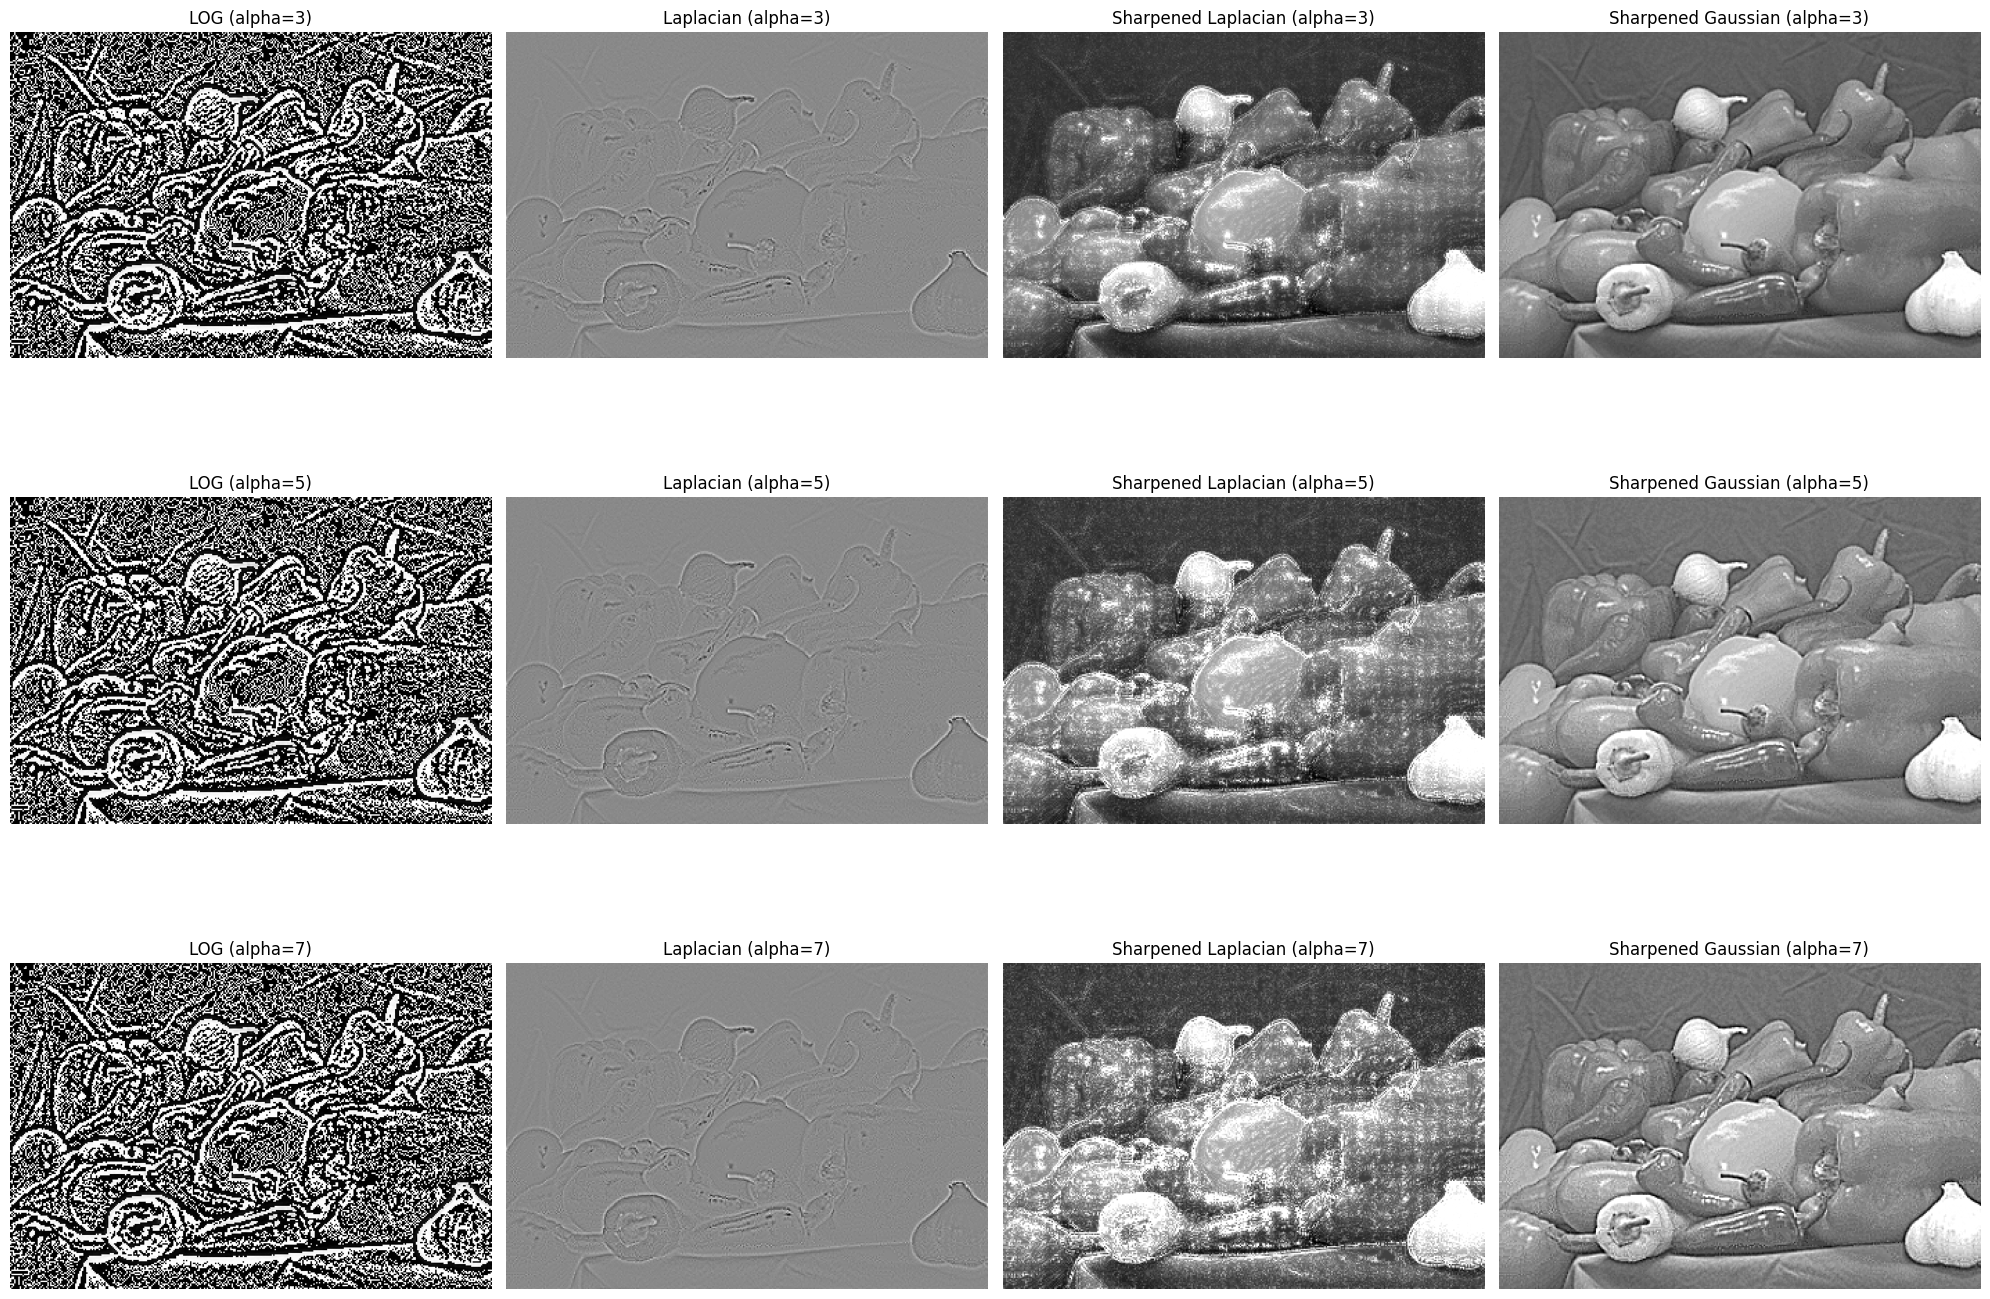

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpli
import cv2
from scipy.ndimage import laplace, gaussian_filter

# Function to read the image using matplotlib
def readImg(path):
    image= mpli.imread(path)
    if image.ndim== 3:
        image= image.mean(axis=2)  # Convert to grayscale if it's a color image
    return (image * 255).astype(np.uint8)

# Function to apply Laplacian filter
def applyLap(image):
    return cv2.Laplacian(image, cv2.CV_64F)

# Function to sharpen using Laplacian result
def sharpenLap(image, alpha):
    laplacian = applyLap(image)
    laplacian = cv2.convertScaleAbs(laplacian)  # Convert to uint8
    return cv2.addWeighted(image, 1, laplacian, alpha, 0)

# Function to apply Laplacian of Gaussian (LOG)
def applyLog(image):
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    return laplace(blurred)

# Function to sharpen using Gaussian filter
def sharpenGauss(image, alpha):
    blurred = gaussian_filter(image, sigma=1)
    blurred = cv2.convertScaleAbs(blurred)  # Convert to uint8
    return cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)

# Path to the image
path = 'D:\\sadeneh\\تمرین دوم\\سادنه صادقی- 9913012008\\Q2\\2-2.png'  

# Load the image
image= readImg(path)

# Apply filters and sharpening methods
values= [3, 5, 7]  # Different alpha values to observe the effect

fig, axs= plt.subplots(len(values), 4, figsize=(20, 15))

for i, alpha in enumerate(values):

    # Laplacian of Gaussian (LOG)
    log= applyLog(image)
    axs[i, 0].imshow(log, cmap='gray')
    axs[i, 0].set_title(f'LOG (alpha={alpha})')
    axs[i, 0].axis('off')


    # Laplacian
    laplacian= applyLap(image)
    axs[i, 1].imshow(laplacian, cmap='gray')
    axs[i, 1].set_title(f'Laplacian (alpha={alpha})')
    axs[i, 1].axis('off')


    # Laplacian and Original
    sharpenedLap= sharpenLap(image, alpha)
    axs[i, 2].imshow(sharpenedLap, cmap='gray')
    axs[i, 2].set_title(f'Sharpened Laplacian (alpha={alpha})')
    axs[i, 2].axis('off')




    # Gaussian Sharpening
    sharpenedGauss = sharpenGauss(image, alpha)
    axs[i, 3].imshow(sharpenedGauss, cmap='gray')
    axs[i, 3].set_title(f'Sharpened Gaussian (alpha={alpha})')
    axs[i, 3].axis('off')


plt.tight_layout()
plt.show()
